# Training model using random forest classifier

In [129]:
import joblib
# Load them back
data = joblib.load("resampled_data.joblib")
X_train_res = data["X_train_res"]
y_train_res = data["y_train_res"]
X_test = data["X_test"]
y_test = data["y_test"] 

print("✅ Resampled data loaded successfully")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
✅ Resampled data loaded successfully


In [131]:
# Train model
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    max_depth=10,        # limit tree depth
    min_samples_split=5, # require more samples to split
    min_samples_leaf=4,  # require more samples per leaf
    random_state=42
)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=42)

- Random Forest classifier is initialized:

    - random_state=42 → ensures reproducible results 🔄
    
    - class_weight='balanced' → helps handle class imbalance ⚖️

- .fit(X_train_res, y_train_res) → trains the model on the SMOTE-balanced training data.

Insight

✅ Model learns from all classes equally due to SMOTE and balanced weights.

✅ Random Forest handles non-linear relationships well.

✅ Ready for evaluation on the test set.

In [133]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix

train_pred = model.predict(X_train_res)

print("Training Accuracy:", accuracy_score(y_train_res, train_pred))
print("Classification Report: \n", classification_report(y_train_res, train_pred, zero_division=0))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_train_res, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, train_pred))

Training Accuracy: 0.9970631424375918
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       0.99      1.00      1.00      2043
         2.0       1.00      0.99      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129

Balanced Accuracy Score: 0.9970631424375918
Confusion Matrix:
 [[2041    2    0]
 [   4 2038    1]
 [   0   11 2032]]


In [134]:
# Optional: evaluate
test_pred = model.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, test_pred))
print('Classification Report: \n',classification_report(y_test, test_pred, zero_division=0))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

Testing Accuracy: 0.935
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.73      0.87      0.79        86
         2.0       0.98      0.95      0.96       511

    accuracy                           0.94       600
   macro avg       0.90      0.72      0.75       600
weighted avg       0.94      0.94      0.94       600

Balanced Accuracy Score: 0.7181819101220185
Confusion Matrix:
 [[  1   2   0]
 [  0  75  11]
 [  0  26 485]]


- Uses the trained Random Forest to predict labels for the test set. 👀
  
- Prints overall accuracy → fraction of correct predictions ✅

- Shows precision, recall, F1-score, and support for each class 📝
 
- zero_division=0 avoids errors if a class is missing in predictions

- Balanced accuracy accounts for class imbalance ⚖️

- Average of recall across all classes → gives a fair performance measure
Insight

🔹 Evaluates how well the model performs on unseen data

🔹 Metrics like F1-score and balanced accuracy are crucial for imbalanced datasets

🔹 Helps identify strengths and weaknesses of the model per class

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # only 50 random combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # use all cores
    verbose=2,
    random_state=42
)

print("Starting RandomizedSearchCV fit...")
random_search.fit(X_train_res, y_train_res)
print("RandomizedSearchCV fit completed!")

# Print best parameters and score
print("Best Parameters Found:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

Starting RandomizedSearchCV fit...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, cl

Code explanation:

- Random Forest setup: rf = RandomForestClassifier(random_state=42) initializes a random forest classifier.

- Parameter grid: param_grid defines ranges of hyperparameters to test, like number of trees, max depth, split criteria, and sampling options.

- Cross-validation strategy: StratifiedKFold ensures each fold preserves the original class distribution.

RandomizedSearchCV:

- Tests 50 random combinations of hyperparameters (n_iter=50).

- Uses 5-fold stratified CV (cv=5).

- Evaluates performance using accuracy.

- Runs in parallel (n_jobs=-1) and shows progress (verbose=2).

Fit model: random_search.fit() trains multiple random forest models with different hyperparameters on your resampled training data (X_train_res, y_train_res).

Output:

- random_search.best_params_ → Best hyperparameters found.

- random_search.best_score_ → Mean accuracy across CV folds for the best hyperparameters.

Test Log Loss: 0.21469623252244668
Test Accuracy: 0.925
              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.73      0.87      0.79        86
         2.0       0.98      0.95      0.96       511

    accuracy                           0.94       600
   macro avg       0.90      0.72      0.75       600
weighted avg       0.94      0.94      0.94       600

Test Balanced Accuracy: 0.5490071147923967
[[  1   2   0]
 [  0  75  11]
 [  0  26 485]]


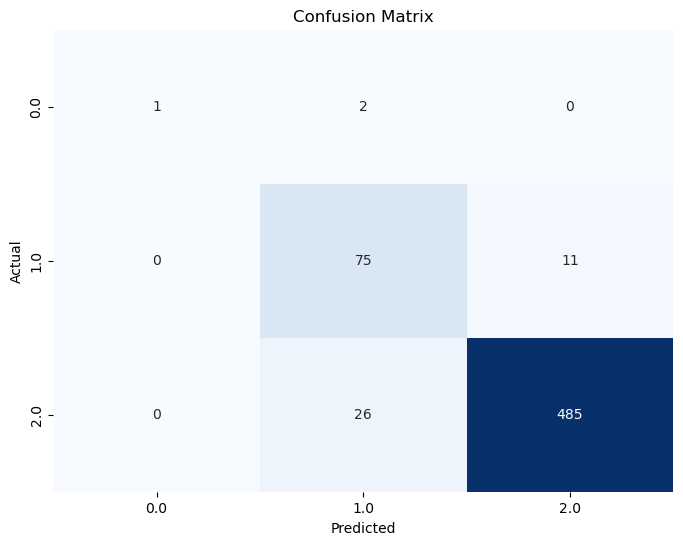

In [138]:
from sklearn.metrics import log_loss

best_rf = random_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)

# Predict probabilities
y_pred_proba = best_rf.predict_proba(X_test)

# Calculate log loss
test_loss = log_loss(y_test, y_pred_proba)
print("Test Log Loss:", test_loss)

# Optional: Accuracy & report
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, test_pred, zero_division=0))
print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Uses the Random Forest with best hyperparameters from RandomisedSearchCV.

- Train best model from RandomisedSearchCV on X_train_res, y_train_res.

- Predict probabilities on X_test and calculate log loss to evaluate probability accuracy.

- predict_proba gives the probability of each class.

- Log loss measures how well these probabilities match actual labels (lower is better).

- Converts probabilities to final class predictions.

- Evaluates performance with accuracy, precision, recall, F1-score, and confusion matrix.

- Predict class labels and compute accuracy, classification report, and confusion matrix.

- Visualize confusion matrix with a heatmap to see misclassifications.

✅ Key Insights from this code

- Probability evaluation: Log loss gives a nuanced view of model performance beyond simple accuracy and evaluates probability predictions.

- Performance metrics: Accuracy, precision, recall, F1-score reveal strengths and weaknesses per class, especially important for imbalanced targets.

- Class confusion: The confusion matrix visually shows where the model misclassifies samples.

- Minority class warning: In this case, UndefinedMetricWarning occurs for very rare classes (like 0.0), highlighting the need for SMOTE or class weighting.

- Useful for imbalanced datasets.